## Q4 Customer segmentation using the RFM values.

In [1]:
# Disbaling 'jedi' to resolve the issue of auto completion
%config Completer.use_jedi = False

**Loading the required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data import and manipulation

### 1. Importing the data set

`Give correct path to the data`

In [3]:
# xlsx = pd.ExcelFile("D:/Study/Data Science/IIMB_BDA Course/Assignment 3/Q4_Clustering/Online Retail.xlsx")

In [4]:
# Name of the excel tabs
# OnlineRetail.sheet_names

In [5]:
OnlineRetail = pd.read_excel("D:/Study/Data Science/IIMB_BDA Course/Assignment 3/Q4_Clustering/Online Retail.xlsx")

In [6]:
%%html
<style>
table {float:left}
</style>

| Variable Name | Description |         
| :-:           |:-------------: | 
|InvoiceNo| Invoice number |
| StockCode | Product (item) code |
|Description| Product (item) name |
|Quantity| The quantities of each product (item) per transaction |
|InvoiceDate| Invoice Date and time |
|UnitPrice| Unit price |
|CustomerID| Customer number |
|Country| Country name  |

In [7]:
OnlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
OnlineRetail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [9]:
OnlineRetail.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,NaN,NaN,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,NaN,NaN,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,NaN,NaN,NaN,NaN,NaN,15287.7,1713.6,12346,13953,15152,16791,18287
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
OnlineRetail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
table = pd.pivot_table(OnlineRetail, index = ['CustomerID'],
              values = ['InvoiceNo'], aggfunc = [len], dropna=False)

In [12]:
table.query('CustomerID == ["12347"]')

,len
,InvoiceNo
CustomerID,
12347.0,182


In [13]:
type(table)

pandas.core.frame.DataFrame

In [14]:
#(pd.crosstab(OnlineRetail.CustomerID,OnlineRetail.InvoiceNo))
#group = pd.DataFrame(OnlineRetail.groupby(['CustomerID', 'InvoiceNo']).size())

**Missing column id rows to be drop as there is no other way to impute the customer id data**

In [15]:
OnlineRetail.dropna(subset=['CustomerID'], inplace=True)

In [16]:
OnlineRetail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
OnlineRetail.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [18]:
OnlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**Quantities and Unit price data are also negative, exclude that as well.**

In [19]:
OnlineRetail = OnlineRetail[OnlineRetail['Quantity'] >= 0]

In [20]:
OnlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [21]:
OnlineRetail.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


> **One thing we can do with RFM is to assign a score for each dimension on a scale from 1 to 5, being 5 the most desired behavior. But before that we have to calculate the RFM values for the cusotmers.**

> ` Note: Here the highest value of recency is considered as 5, not zero. Also recency is calculate on the basis of days, not month.`

In [22]:
import datetime as dt

In [23]:
print('Most recent invoice is from:', OnlineRetail.InvoiceDate.max())

Most recent invoice is from: 2011-12-09 12:50:00


In [24]:
StudyDate = dt.datetime(2011,12,10)

In [25]:
OnlineRetail['InvoiceDate'] = pd.to_datetime(OnlineRetail['InvoiceDate'])
OnlineRetail['Total Price'] = (OnlineRetail.Quantity)*(OnlineRetail.UnitPrice)

In [26]:
OnlineRetail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


### Q4.1 Calculate the RFM values for each customer (by customer id).

`RFM table`

In [27]:
RFMTable = OnlineRetail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (StudyDate - x.max()).days,  # recency
                                                   'InvoiceNo'  : lambda x: len(x),                      # Frequency
                                                   'Total Price': lambda x: x.sum()})                    # Monetary value

In [28]:
type(RFMTable)

pandas.core.frame.DataFrame

In [29]:
RFMTable.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
InvoiceDate    4339 non-null int64
InvoiceNo      4339 non-null int64
Total Price    4339 non-null float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [30]:
RFMTable.rename(columns={'InvoiceDate':'recency',
                         'InvoiceNo'  :'frequency',
                         'Total Price':'monetary'}, inplace = True)

RFMTable.head(10)

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


### Q4.2 Find top 10 customers based on frequency and monetary value. Sort them based on first frequency and then monetary value.

In [31]:
columns = ['frequency', 'monetary']

for n in range(len(columns)):
    RFMTable = RFMTable.sort_values(by = columns[n], ascending=False)
    
Top10_Customer = RFMTable.head(10)
print(Top10_Customer)

            recency  frequency   monetary
CustomerID                               
14646.0           1       2080  280206.02
18102.0           0        431  259657.30
17450.0           8        337  194550.79
16446.0           0          3  168472.50
14911.0           1       5677  143825.06
12415.0          24        716  124914.53
14156.0           9       1400  117379.63
17511.0           2        963   91062.38
16029.0          38        242   81024.84
12346.0         325          1   77183.60


#### Top 10 customer as per frequency and monetary values.

In [32]:
Top10_Customer.index.tolist()

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 16029.0,
 12346.0]

> **Now we sort the frequency and monetary values in descending order and recency is ascending order as more recent is more better. Also going to create a score table.**

`Adding Frequency and Monetary value scores`

In [33]:
f_score =[]
m_score =[]
r_score =[]

columns = ['frequency', 'monetary']
scores_str = ['f_score', 'm_score']
scores =[f_score, m_score]

for n in range(len(columns)):
    RFMTable = RFMTable.sort_values(by = columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,4340)   # no. of observations
    RFMTable['refs'] = refs
    
    # Add Score
    for i, row in RFMTable.iterrows():    # i - customerID as index, row - complete row
        if row['refs'] <= 866:
            scores[n].append(5)
        elif row['refs'] > 866   and row['refs'] <= 866*2:
            scores[n].append(4)
        elif row['refs'] > 866*2 and row['refs'] <= 866*3:
            scores[n].append(3)
        elif row['refs'] > 866*3 and row['refs'] <= 866*4:
            scores[n].append(2)
        else:
            scores[n].append(1)
    
    RFMTable[scores_str[n]] = scores[n]

`Adding Recency value scores`

In [34]:
# for recency - sort by ascending order
RFMTable = RFMTable.sort_values('recency', ascending=True)

refs = np.arange(1,4340)      # 4340 - no. of entries
RFMTable['refs'] = refs

for i, row in RFMTable.iterrows():
    if row['refs'] <= 866:
        r_score.append(5)
    elif row['refs'] > 866   and row['refs'] <= 866*2:
        r_score.append(4)
    elif row['refs'] > 866*2 and row['refs'] <= 866*3:
        r_score.append(3)
    elif row['refs'] > 866*3 and row['refs'] <= 866*4:
        r_score.append(2)
    else:
        r_score.append(1)
        
RFMTable['r_score'] = r_score

In [35]:
RFMTable.head(10)

,recency,frequency,monetary,refs,f_score,m_score,r_score
CustomerID,,,,,,,
13426.0,0,157,3641.32,1,5,5,5
12423.0,0,125,1859.31,2,5,4,5
12518.0,0,124,2056.89,3,5,4,5
17389.0,0,213,31833.68,4,5,5,5
14446.0,0,293,1039.58,5,5,4,5
17364.0,0,411,4481.18,6,5,5,5
17754.0,0,92,1772.26,7,4,4,5
13777.0,0,197,25977.16,8,5,5,5
12526.0,0,71,1316.66,9,4,4,5


In [36]:
RFMTableScores = RFMTable.drop(['recency', 'frequency', 'monetary', 'refs'], axis = 1)
RFMTableScores.sample(10)

,f_score,m_score,r_score
CustomerID,,,
16370.0,5,4,2
13159.0,4,4,5
18114.0,2,1,1
14819.0,1,2,3
13213.0,4,4,3
14338.0,3,3,2
16076.0,5,5,5
12448.0,2,2,3
13296.0,1,1,2


In [37]:
(RFMTableScores.sort_values(by = ['f_score', 'm_score'], ascending=False)).head(10)

,f_score,m_score,r_score
CustomerID,,,
13426.0,5,5,5
17389.0,5,5,5
17364.0,5,5,5
13777.0,5,5,5
16558.0,5,5,5
15804.0,5,5,5
14422.0,5,5,5
13069.0,5,5,5
16705.0,5,5,5


**Above are the top 10 customers as per FM scores.**

### Q4.3 Find optimal number of segments using dendogram and elbow method.

#### Elbow method (K-means Clustering)

In [38]:
from sklearn.cluster import KMeans

wcss = []    # within cluster sum of squrared
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init='k-means++', random_state=42 )
    kmeans.fit(RFMTableScores)
    wcss.append(kmeans.inertia_)

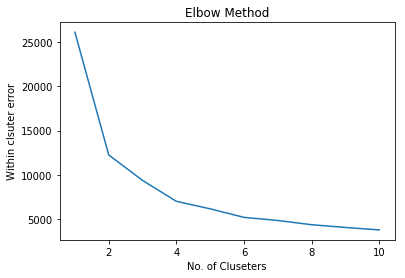

In [39]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Cluseters')
plt.ylabel('Within clsuter error')
plt.show()

`As the "elbow method" 4 is the good number of clusters for customer segmentation.So build the model using cluster = 4.` 

#### Hierarchical Clustering

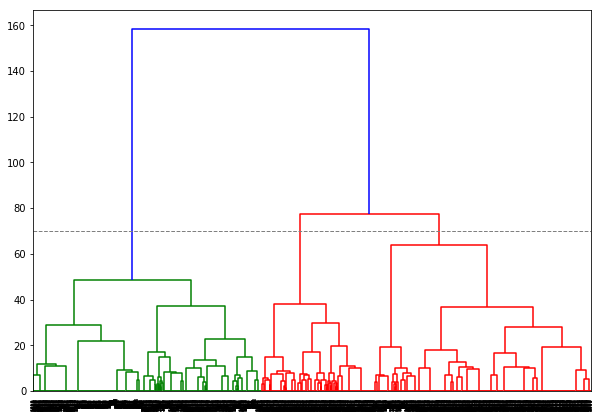

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(RFMTableScores, 'ward')

plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add horizontal line.
plt.axhline(y=70, c='grey', lw=1, linestyle='dashed')
plt.show()

**So as per the above dendrogram, cluster = 3 is a good option for segmenting customer.**

### Q4.4 Create final segment of customers and label the customers based on which segment they belong to.

> I am using KMeans clustering with cluster = 4 for segmenting the customer as per the RFM values.

In [41]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(RFMTableScores)

#### Labling the customer

In [42]:
RFMTable['clusters'] = clusters
RFMTable.sample(10)

,recency,frequency,monetary,refs,f_score,m_score,r_score,clusters
CustomerID,,,,,,,,
13631.0,99,11,3070.42,2970,1,5,2,2
15843.0,303,8,118.95,4087,1,1,1,1
13615.0,318,23,417.69,4154,2,2,1,1
13434.0,74,10,534.24,2680,1,3,2,1
16005.0,12,218,615.39,829,5,3,5,0
17980.0,165,30,811.45,3390,3,3,2,2
14784.0,26,15,289.99,1492,2,2,4,3
15498.0,2,512,13316.40,222,5,5,5,0
14672.0,234,61,765.55,3751,4,3,1,2


#### Visualize the clusters

In [43]:
c1 = RFMTable[RFMTable.clusters == 0]
c2 = RFMTable[RFMTable.clusters == 1]
c3 = RFMTable[RFMTable.clusters == 2]
c4 = RFMTable[RFMTable.clusters == 3]

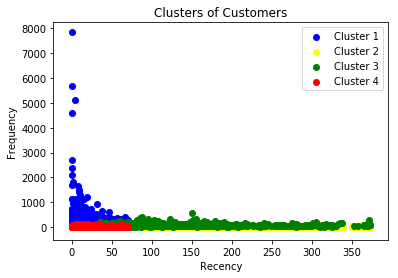

In [44]:
plt.scatter(c1.recency, c1.frequency, c = 'blue',   label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green',  label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c = 'red',    label = 'Cluster 4')

plt.title('Clusters of Customers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

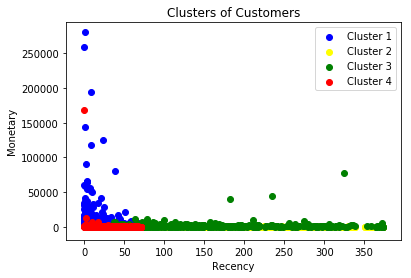

In [45]:
plt.scatter(c1.recency, c1.monetary, c = 'blue',   label = 'Cluster 1')
plt.scatter(c2.recency, c2.monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.monetary, c = 'green',  label = 'Cluster 3')
plt.scatter(c4.recency, c4.monetary, c = 'red',    label = 'Cluster 4')

plt.title('Clusters of Customers')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

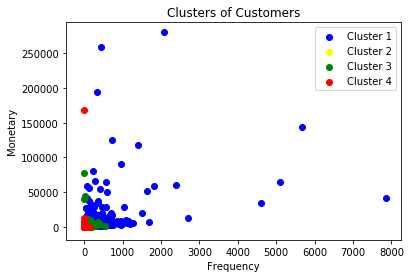

In [46]:
plt.scatter(c1.frequency, c1.monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.frequency, c4.monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of Customers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

### Q4.5 Explain each segment intuitively.

#### Bubble plots

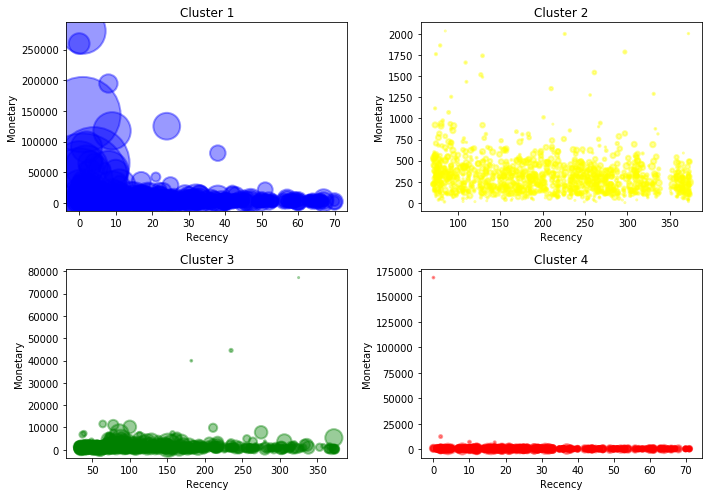

In [47]:
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
plt.scatter(c1.recency, c1.monetary, s = c1.frequency, c = 'blue', alpha=0.4, linewidth=2)
plt.title('Cluster 1')
plt.xlabel('Recency')
plt.ylabel('Monetary')
#plt.legend()
#plt.show()

plt.subplot(2,2,2)
plt.scatter(c2.recency, c2.monetary, s = c2.frequency, c = 'yellow', alpha=0.4, linewidth=2)
plt.title('Cluster 2')
plt.xlabel('Recency')
plt.ylabel('Monetary')
#plt.legend()


plt.subplot(2,2,3)
plt.scatter(c3.recency, c3.monetary, s = c3.frequency, c = 'green', alpha=0.4, linewidth=2)
plt.title('Cluster 3')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(2,2,4)
plt.scatter(c4.recency, c4.monetary, s = c4.frequency, c = 'red', alpha=0.4, linewidth=2)
plt.title('Cluster 4')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.tight_layout()  # to avoid the overlapping of figures
plt.show()

> **Customer Segment 1 (Cluster 1)**: These customers are highly important for the online store as they posses high monetary value with good frequency and less recency.  

> **Customer Segment 2 (Cluster 2)**: These customers having low monetary value with lower frequency of purchase. They even purchased long time back, so online store should come up with some strategy to retain these customers.

> **Customer Segment 3 (Cluster 3)**: These customers are spending good amount on online purchase with average frequency and higher recency.

> **Customer Segment 4 (Cluster 4)**: These customers are spending average amount of money with less frequency and less recency. They are going to add in the sales values but less frequently.